In [6]:
import pandas as pd
import numpy as np

In [7]:
import seaborn as sns

In [8]:
fueleco = pd.read_csv("data/vehicles.csv.zip")

/var/folders/_l/nhxw713s4yx4h9jgpqkyf7qw0000gn/T/ipykernel_1208/1669104439.py:1: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  fueleco = pd.read_csv("data/vehicles.csv.zip")


> **혼합된 데이터 type때문**

In [9]:
fueleco.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [10]:
fueleco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43418 entries, 0 to 43417
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        43418 non-null  float64
 1   barrelsA08       43418 non-null  float64
 2   charge120        43418 non-null  float64
 3   charge240        43418 non-null  float64
 4   city08           43418 non-null  int64  
 5   city08U          43418 non-null  float64
 6   cityA08          43418 non-null  int64  
 7   cityA08U         43418 non-null  float64
 8   cityCD           43418 non-null  float64
 9   cityE            43418 non-null  float64
 10  cityUF           43418 non-null  float64
 11  co2              43418 non-null  int64  
 12  co2A             43418 non-null  int64  
 13  co2TailpipeAGpm  43418 non-null  float64
 14  co2TailpipeGpm   43418 non-null  float64
 15  comb08           43418 non-null  int64  
 16  comb08U          43418 non-null  float64
 17  combA08     

In [11]:
fueleco.isna().sum().sum()/(fueleco.shape[0] * fueleco.shape[1])
#nan의 비율이 나옴!

0.13303876522257438

In [12]:
fueleco.iloc[:,:5].describe().T
#iloc은 index[n] 했을 때 n위치에 인덱스 가능!

,count,mean,std,min,25%,50%,75%,max
barrels08,43418.0,17.132865,4.678481,0.06,14.33087,16.4805,19.388824,47.087143
barrelsA08,43418.0,0.221869,1.142116,0.00,0.00000,0.0000,0.000000,18.311667
charge120,43418.0,0.000000,0.000000,0.00,0.00000,0.0000,0.000000,0.000000
charge240,43418.0,0.066276,0.739613,0.00,0.00000,0.0000,0.000000,15.300000
city08,43418.0,18.654521,8.750168,6.00,15.00000,17.0000,21.000000,150.000000


In [13]:
#fueleco.mean().head()
#이전 버전에선 numeric이 아닌 열은 제거, but 다음 버전에선 그런거 없음 그래서 warning

In [14]:
fueleco.select_dtypes(include = 'number').mean().head()
# 또는 fueleco.mean(numeric_only=True).head()

barrels08     17.132865
barrelsA08     0.221869
charge120      0.000000
charge240      0.066276
city08        18.654521
dtype: float64

In [15]:
fueleco.select_dtypes(include = 'number').head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,23.3333,0.0,35.0000,0.0,1985,-2250,0.0,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,11.0000,0.0,19.0000,0.0,1985,-11500,0.0,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,29.0000,0.0,47.0000,0.0,1985,0,0.0,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,12.2222,0.0,16.6667,0.0,1985,-11500,0.0,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,21.0000,0.0,32.0000,0.0,1993,-6000,0.0,0,0,0


In [16]:
fueleco.select_dtypes(include = 'number').quantile([0,0.2,0.5,0.75,1]).T

,0.00,0.20,0.50,0.75,1.00
barrels08,0.06,13.733750,16.48050,19.388824,47.087143
barrelsA08,0.00,0.000000,0.00000,0.000000,18.311667
charge120,0.00,0.000000,0.00000,0.000000,0.000000
charge240,0.00,0.000000,0.00000,0.000000,15.300000
city08,6.00,14.000000,17.00000,21.000000,150.000000
city08U,0.00,0.000000,0.00000,15.877425,150.195800
cityA08,0.00,0.000000,0.00000,0.000000,145.000000
cityA08U,0.00,0.000000,0.00000,0.000000,145.083500
cityCD,0.00,0.000000,0.00000,0.000000,5.350000
cityE,0.00,0.000000,0.00000,0.000000,122.000000


In [17]:
fueleco.dtypes.value_counts()

float64    32
int64      27
object     23
bool        1
Name: count, dtype: int64

# 1. int 형 데이터 줄이기

In [18]:
fueleco.describe(include=np.int64)

,city08,cityA08,co2,co2A,comb08,combA08,engId,feScore,fuelCost08,fuelCostA08,...,lv2,lv4,pv2,pv4,range,year,youSaveSpend,phevCity,phevHwy,phevComb
count,43418.000000,43418.000000,43418.000000,43418.000000,43418.000000,43418.000000,43418.000000,43418.000000,43418.000000,43418.000000,...,43418.000000,43418.000000,43418.000000,43418.000000,43418.000000,43418.000000,43418.000000,43418.000000,43418.000000,43418.000000
mean,18.654521,0.780805,103.802639,5.910291,20.894997,0.836888,7752.441913,0.592197,2400.533189,83.403197,...,1.782602,6.039868,13.395642,33.535884,1.184278,2002.536022,-3992.174904,0.229836,0.231563,0.229628
std,8.750168,6.050073,185.336192,57.330146,8.401355,6.034436,16894.286167,2.843539,671.690218,442.658866,...,4.331941,9.566007,30.946350,45.993292,16.726704,11.650912,3369.439953,3.526150,3.405325,3.449732
min,6.000000,0.000000,-1.000000,-1.000000,7.000000,0.000000,0.000000,-1.000000,450.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1984.000000,-29750.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,-1.000000,-1.000000,17.000000,0.000000,0.000000,-1.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1992.000000,-6000.000000,0.000000,0.000000,0.000000
50%,17.000000,0.000000,-1.000000,-1.000000,20.000000,0.000000,164.000000,-1.000000,2400.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2003.000000,-4000.000000,0.000000,0.000000,0.000000
75%,21.000000,0.000000,228.000000,-1.000000,23.000000,0.000000,4122.000000,2.000000,2800.000000,0.000000,...,0.000000,13.000000,0.000000,91.000000,0.000000,2013.000000,-1750.000000,0.000000,0.000000,0.000000
max,150.000000,145.000000,893.000000,713.000000,142.000000,133.000000,69102.000000,10.000000,7550.000000,3750.000000,...,41.000000,55.000000,194.000000,192.000000,402.000000,2022.000000,5750.000000,97.000000,81.000000,88.000000


In [19]:
np.iinfo(np.int16) #크기 int 16 적당함.

iinfo(min=-32768, max=32767, dtype=int16)

In [20]:
fueleco[['city08','comb08']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43418 entries, 0 to 43417
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   city08  43418 non-null  int64
 1   comb08  43418 non-null  int64
dtypes: int64(2)
memory usage: 678.5 KB


In [21]:
(
fueleco[['city08','comb08']]
    .assign(city08 = fueleco.city08.astype(np.int16),
            comb08 = fueleco.comb08.astype(np.int16))
    .info(memory_usage='deep')
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43418 entries, 0 to 43417
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   city08  43418 non-null  int16
 1   comb08  43418 non-null  int16
dtypes: int16(2)
memory usage: 169.7 KB


In [22]:
# object 타입은, include 활용
fueleco.describe(include=object).T

,count,unique,top,freq
drive,42232,7,Front-Wheel Drive,14776
eng_dscr,26887,562,(FFS),8827
fuelType,43418,14,Regular,27381
fuelType1,43418,6,Regular Gasoline,28828
make,43418,139,Chevrolet,4159
model,43418,4375,F150 Pickup 2WD,226
mpgData,43400,2,N,29726
trany,43407,40,Automatic 4-spd,11048
VClass,43418,34,Compact Cars,6086
guzzler,2558,3,G,1579


# 2. 문자열 데이터 줄이기

In [23]:
fueleco.make.nunique()

139

In [24]:
fueleco.model.nunique() #얘는 카테고리로 바꾸기 힘듬

4375

In [25]:
(
fueleco[['make']]
    .assign(make = fueleco.make.astype('category'))
    .memory_usage(deep=True)
)

Index       128
make     100495
dtype: int64

# 3. 그림그리기

In [26]:
fueleco.select_dtypes(object).columns

Index(['drive', 'eng_dscr', 'fuelType', 'fuelType1', 'make', 'model',
       'mpgData', 'trany', 'VClass', 'guzzler', 'trans_dscr', 'tCharger',
       'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode',
       'c240Dscr', 'c240bDscr', 'createdOn', 'modifiedOn', 'startStop'],
      dtype='object')

In [27]:
fueleco.drive.nunique()

7

In [28]:
fueleco.drive.value_counts()

drive
Front-Wheel Drive             14776
Rear-Wheel Drive              14409
4-Wheel or All-Wheel Drive     6645
All-Wheel Drive                3788
4-Wheel Drive                  1788
2-Wheel Drive                   507
Part-time 4-Wheel Drive         319
Name: count, dtype: int64

In [29]:
fueleco.drive.isna().sum()

1186

<Axes: xlabel='drive'>

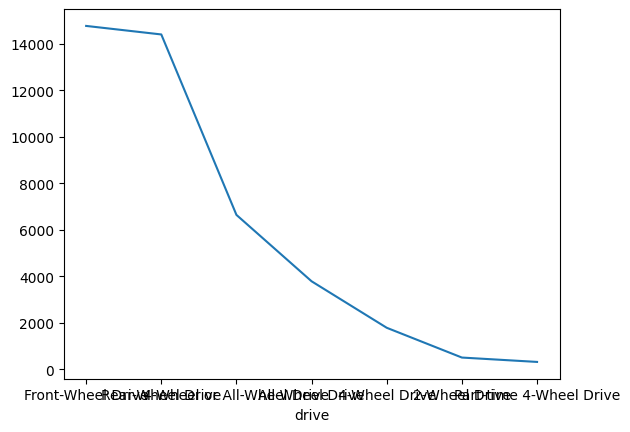

In [30]:
fueleco.drive.value_counts().plot() #속성 값 별 그래프

<Axes: xlabel='drive'>

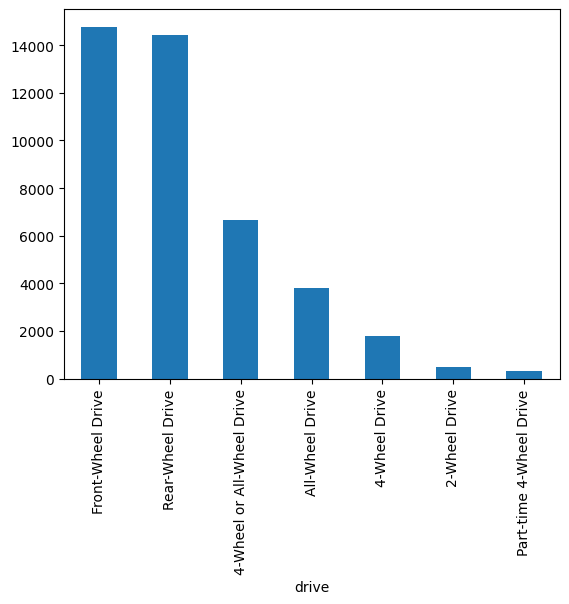

In [31]:
fueleco.drive.value_counts().plot(kind='bar')

In [32]:
import matplotlib.pyplot as plt

<BarContainer object of 7 artists>

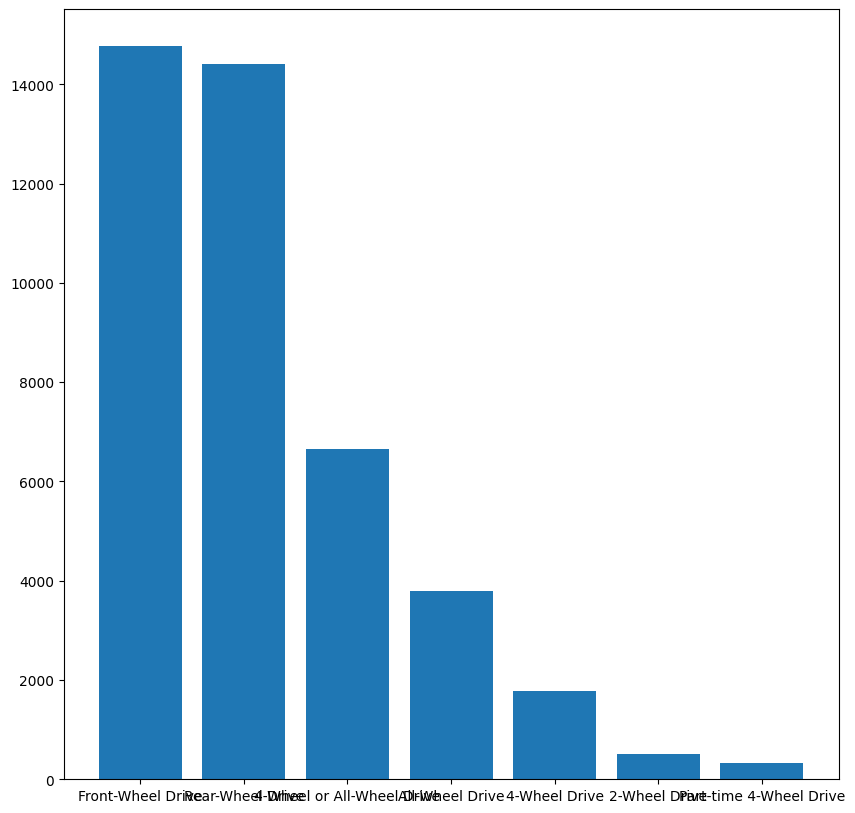

In [84]:
ax,fig = plt.subplots(figsize=(10,10))
x = fueleco.drive.value_counts().index
plt.bar(x,fueleco.drive.value_counts())

In [34]:
fueleco.drive.value_counts()
#시리즈 형식으로 나오는데 위에 bar 그래프 생성 시 x 축을 위의 식에서 index 해야 속성 이름들이 나옴.

drive
Front-Wheel Drive             14776
Rear-Wheel Drive              14409
4-Wheel or All-Wheel Drive     6645
All-Wheel Drive                3788
4-Wheel Drive                  1788
2-Wheel Drive                   507
Part-time 4-Wheel Drive         319
Name: count, dtype: int64

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

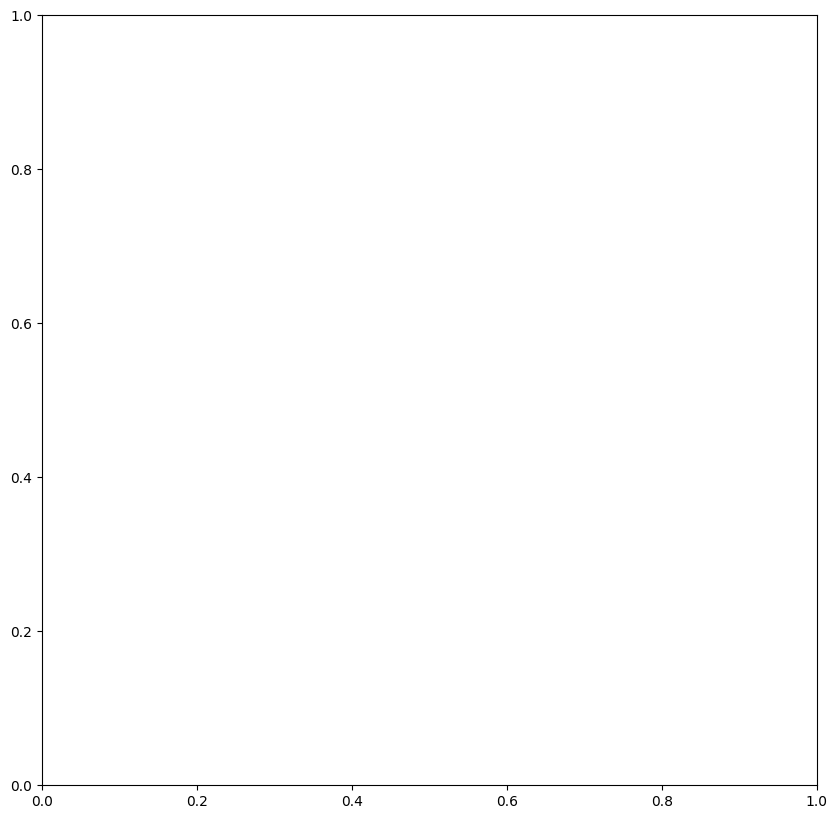

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

ax,fig = plt.subplots(figsize=(10,10))
sns.barplot(fueleco.drive.index,fueleco.drive.value_counts())

In [43]:
top_make_n = fueleco.make.value_counts().index[:6]
# column의 nunique가 많을 경우 최대 n개만 보는 것도 방법!

In [44]:
top_make_n

Index(['Chevrolet', 'Ford', 'Dodge', 'GMC', 'Toyota', 'BMW'], dtype='object', name='make')

<Axes: xlabel='make', ylabel='count'>

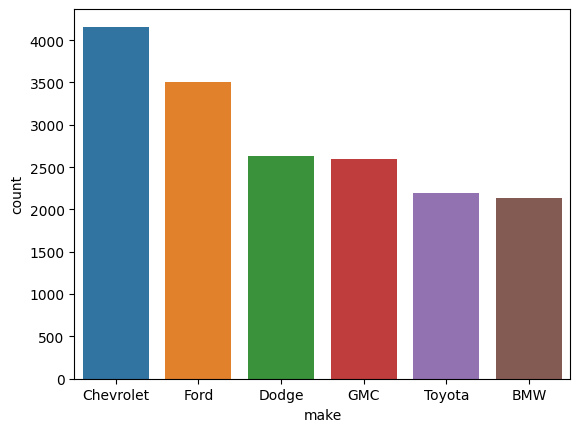

In [45]:
top_make_n = fueleco.make.value_counts().index[:6]
sns.barplot(x=fueleco[fueleco.make.isin(top_make_n)].make.value_counts().index, y=fueleco[fueleco.make.isin(top_make_n)].make.value_counts())

fueleco[fueleco.make.isin(top_make_n)] 라고 할 수 있음!

# where 사용 ( false일 때만 실행)

In [46]:
fueleco.make.where(fueleco.make.isin(top_make_n),'Other')

0        Other
1        Other
2        Dodge
3        Dodge
4        Other
         ...  
43413    Other
43414    Other
43415    Other
43416    Other
43417    Other
Name: make, Length: 43418, dtype: object

In [47]:
fueleco.make.where(fueleco.make.isin(top_make_n),'Other').value_counts()
#masking 기법!

make
Other        26193
Chevrolet     4159
Ford          3508
Dodge         2632
GMC           2599
Toyota        2189
BMW           2138
Name: count, dtype: int64

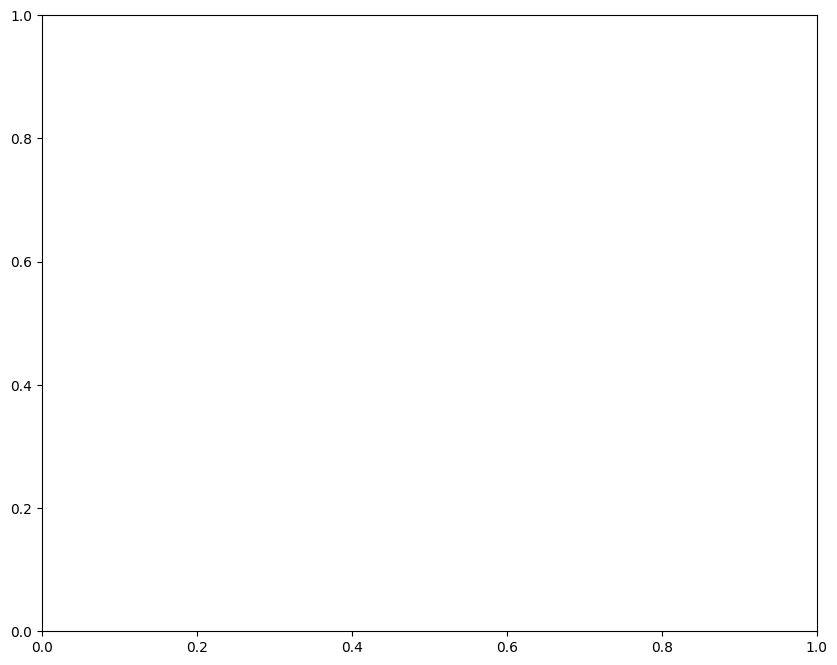

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,8))

<Axes: xlabel='make'>

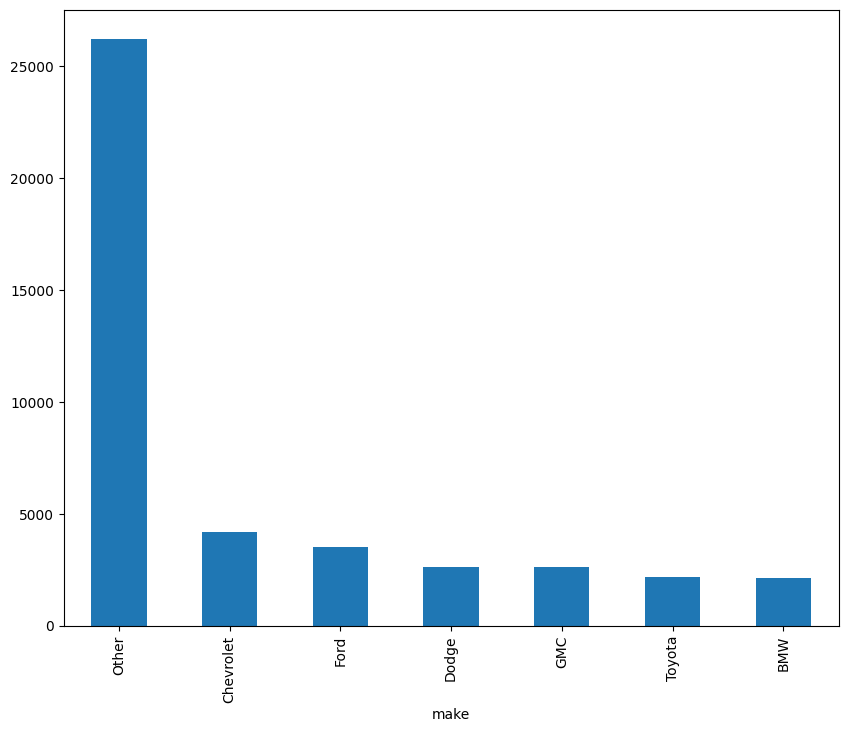

In [49]:
import matplotlib.pyplot as plt # 이 부분은 관용적으로 이렇게 씁니다.
fig, ax = plt.subplots(figsize=(10, 8))
top_n = fueleco.make.value_counts().index[:6]
(
    fueleco.assign(
        make=fueleco.make.where(
            fueleco.make.isin(top_n), 'Other')) #top_n이 아닌 애들을 다 'Other'로 바꾸고 
    .make.value_counts()
    .plot(kind="bar") #plot(kind="bar")를 호출하는 것 만으로도 x축과 y축이 자동으로 설정됩니다.
    
)


<Axes: xlabel='make'>

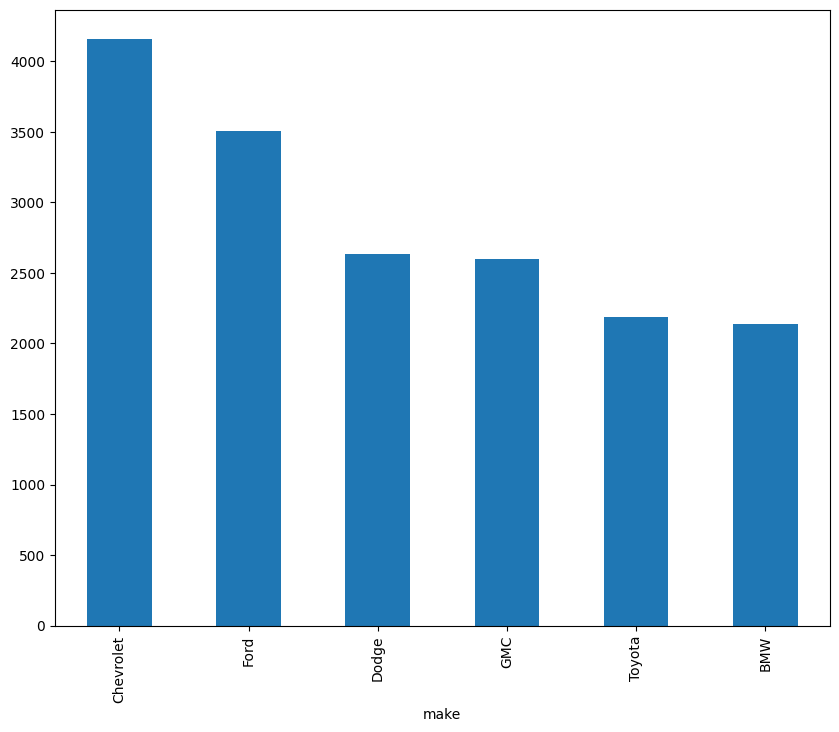

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

top_n = fueleco.make.value_counts().index[:6]
(
    fueleco.assign(
        make = fueleco.make.where(fueleco.make.isin(top_n), 'Other')
    )
    .make.value_counts()[1:]
    .plot.bar(ax=ax)
)


In [51]:
fueleco.select_dtypes('object').columns

Index(['drive', 'eng_dscr', 'fuelType', 'fuelType1', 'make', 'model',
       'mpgData', 'trany', 'VClass', 'guzzler', 'trans_dscr', 'tCharger',
       'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode',
       'c240Dscr', 'c240bDscr', 'createdOn', 'modifiedOn', 'startStop'],
      dtype='object')

<Axes: xlabel='count', ylabel='fuelType1'>

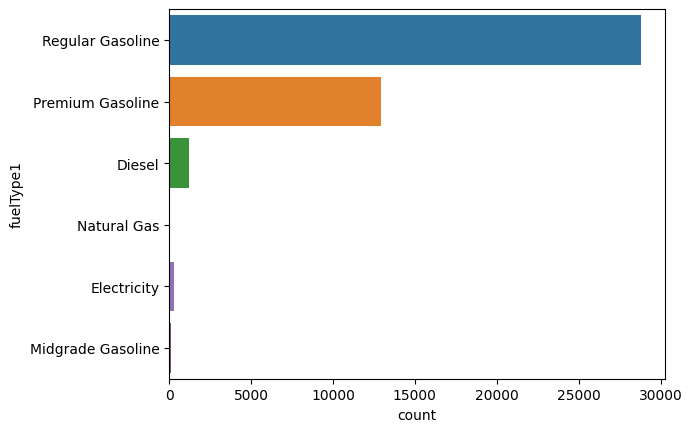

In [52]:
sns.countplot(y='fuelType1',data = fueleco) #order를 지정해주지 않으면 값 순서 대로 나옴

<Axes: xlabel='count', ylabel='fuelType1'>

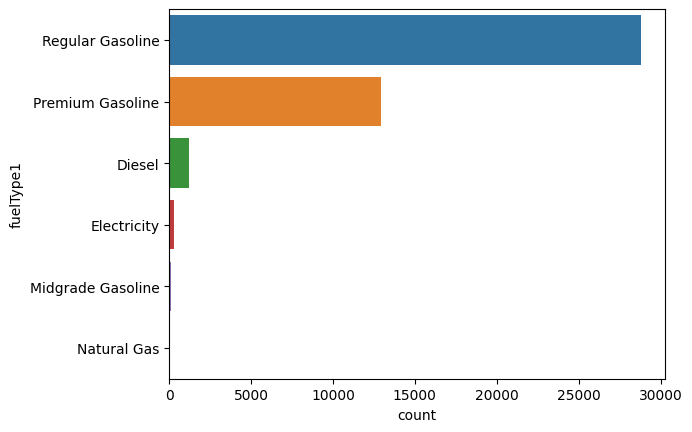

In [53]:
sns.countplot(y='fuelType1',data = fueleco, order=fueleco.fuelType1.value_counts().index) # 인덱스 순으로 나옴.

<Axes: xlabel='count', ylabel='make'>

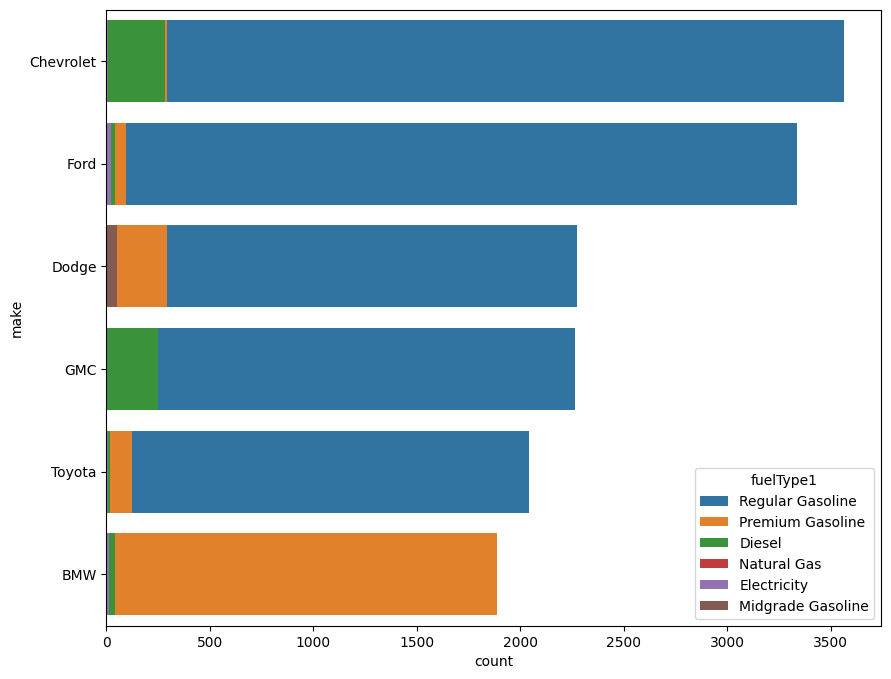

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

top_n = fueleco.make.value_counts().index[:6]
# make_counts = fueleco[fueleco.make.isin(top_n)].make.value_counts()
# make_counts = make_counts.reindex(top_n)

fig, ax = plt.subplots(figsize=(10,8))

sns.countplot(y='make',
              data=fueleco[fueleco.make.isin(top_n)],
              hue='fuelType1', 
              order=fueleco.make.value_counts().index[:6],
              dodge=False,
              ax=ax
             )


**hue는 색깔을 지정해주는 함수 , 히스토그램이 아님.**
**dodge=False = 그래프 뭉치게, True는 옆으로 그려짐**

<Axes: xlabel='count', ylabel='make'>

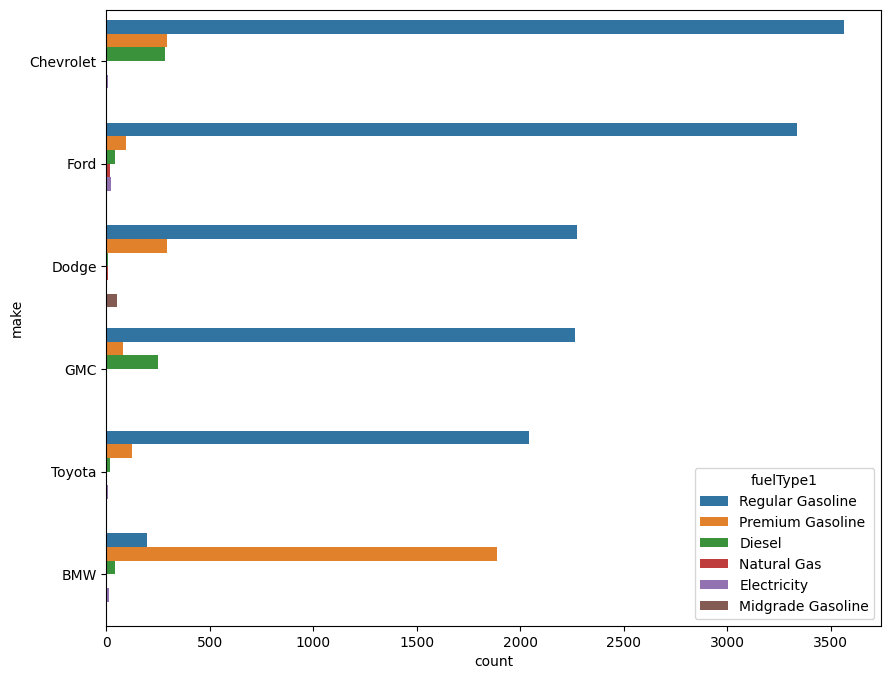

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

top_n = fueleco.make.value_counts().index[:6]
# make_counts = fueleco[fueleco.make.isin(top_n)].make.value_counts()
# make_counts = make_counts.reindex(top_n)

fig, ax = plt.subplots(figsize=(10,8))

sns.countplot(y='make',
              data=fueleco[fueleco.make.isin(top_n)],
              hue='fuelType1', 
              order=fueleco.make.value_counts().index[:6],
              dodge=True,
              ax=ax
             )


<Axes: xlabel='city08', ylabel='Count'>

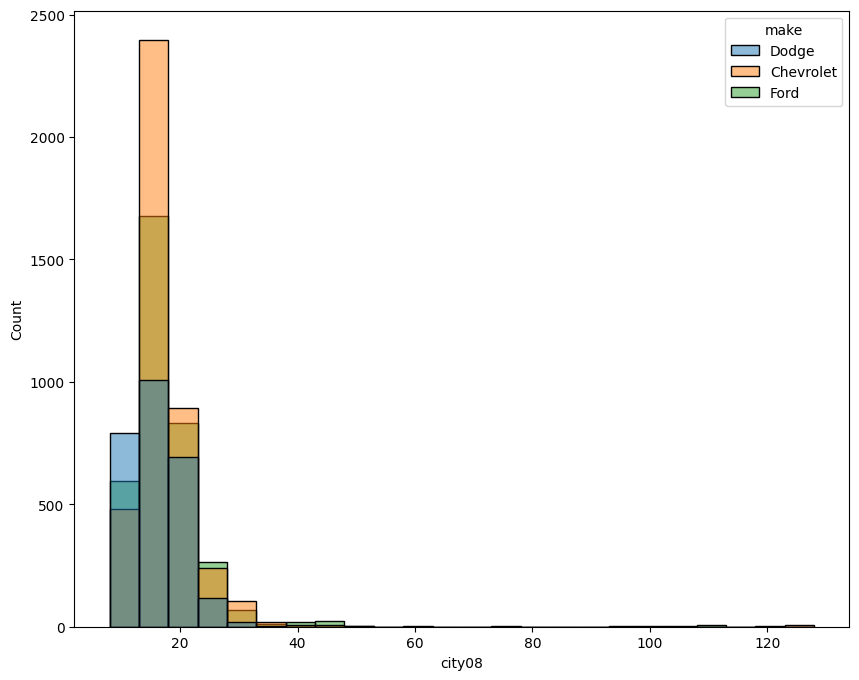

In [56]:
fig,ax = plt.subplots(figsize = (10,8))
top_n = fueleco.make.value_counts().index[:3]
sns.histplot(x='city08',
             data = (fueleco[fueleco.make.isin(top_n)]),
             hue = 'make',
             binwidth = 5,
             ax=ax
            )

# na 값이 많은 컬럼 다루기

In [57]:
fueleco.drive.isna().sum()

1186

In [58]:
fueleco.drive.value_counts(dropna=False) #그냥 카운트 할 경우 na 가 누락됨.

drive
Front-Wheel Drive             14776
Rear-Wheel Drive              14409
4-Wheel or All-Wheel Drive     6645
All-Wheel Drive                3788
4-Wheel Drive                  1788
NaN                            1186
2-Wheel Drive                   507
Part-time 4-Wheel Drive         319
Name: count, dtype: int64

<Axes: xlabel='drive'>

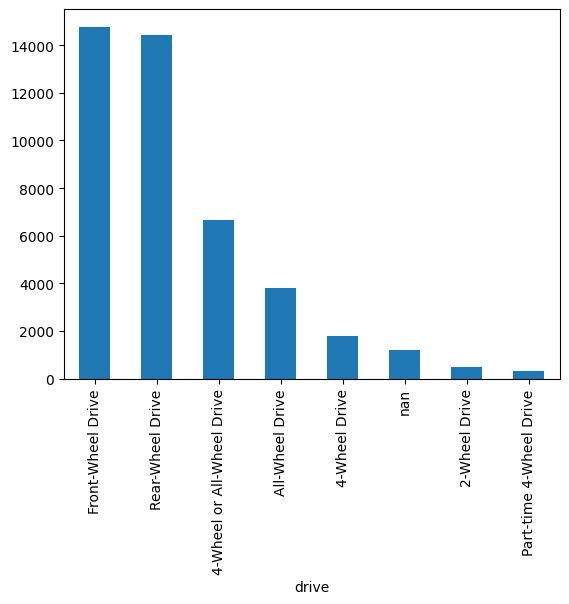

In [59]:
fueleco.drive.value_counts(dropna=False).plot.bar()

## object 형태 -> 수치형?

rangeA는 object 형태인데, 값을 확인해보면 그런 것 같지 않습니다.
rangeA열을 봅시다.

In [60]:
fueleco.rangeA.value_counts()

rangeA
290        74
270        58
280        56
310        41
277        38
           ..
362/537     1
337/501     1
286         1
341         1
301         1
Name: count, Length: 235, dtype: int64

362/537 이딴 이상한 애들 많음

In [61]:
(
    fueleco.rangeA.str.extract(r'([^0-9.])') #숫자와 소수점이 아니 문자를 추출!
    .dropna()
    .apply(lambda y:''.join(y), axis=1)
    .value_counts()
)


/    323
-     71
Name: count, dtype: int64

1. apply() : DF 나 S에 함수를 적용하는 메소드, axis =1 or 0 으로 열또는 행으로 추출
2. row: ''.join(row)는 row에 ' ' 으로 되어 있는 애들을 묶는다.

In [62]:
set(fueleco.rangeA.apply(type)) #apply에서 axis는 S만 지정 가능!

{float, str}

In [94]:
(
    fueleco.rangeA.fillna('0')
    .str.replace('-','/')
    .str.split('/', expand=True) #expand = True : DF로 반환!
    .astype(float)
    .mean(axis=1)
)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
43413    0.0
43414    0.0
43415    0.0
43416    0.0
43417    0.0
Length: 43418, dtype: float64

# 수치화를 범주화로 사용하는 방법

- cut: 동일한 너비의 구간으로 나눔
- qcut: 분위수를 기준으로 나눔

In [64]:
(
    fueleco.rangeA.fillna('0')
    .str.replace('-', '/')
    .str.split('/', expand=True)
    .astype(float)
    .mean(axis=1)
    .pipe(lambda x: pd.cut(x, 10)) #10구간으로 나눈다.
    .value_counts()
)


(-0.45, 44.95]     41889
(269.7, 314.65]      600
(314.65, 359.6]      379
(359.6, 404.55]      216
(224.75, 269.7]      187
(404.55, 449.5]       92
(89.9, 134.85]        21
(44.95, 89.9]         20
(179.8, 224.75]        9
(134.85, 179.8]        5
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

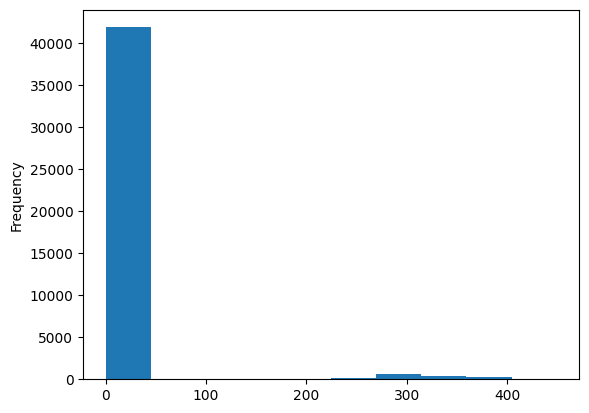

In [65]:
(
    fueleco.rangeA.fillna('0')
    .str.replace('-','/')
    .str.split('/',expand = True)
    .astype(float)
    .mean(axis = 1)
    .plot.hist(bins=10)
)

In [86]:
(
     fueleco.rangeA.dropna() #fillna를 할 시 분위수로 나눌 수 없어서 에러발생
     .str.replace('-', '/')
     .str.split('/', expand=True)
     .astype(float)
     .mean(axis=1)
     .pipe(lambda ser_: pd.qcut(ser_, 10))
     .value_counts()
)


(29.0, 260.0]     208
(350.0, 385.0]    178
(273.0, 287.0]    176
(287.0, 300.0]    176
(8.999, 29.0]     175
(314.0, 330.0]    172
(330.0, 350.0]    171
(300.0, 314.0]    168
(385.0, 449.5]    166
(260.0, 273.0]    136
Name: count, dtype: int64

<Axes: xlabel='city08'>

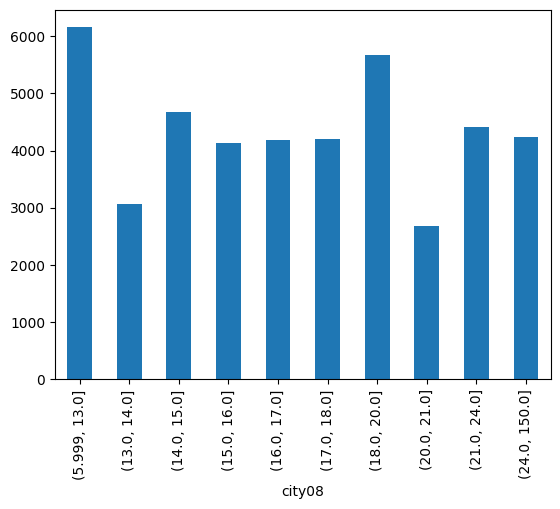

In [67]:
(
    fueleco.city08.pipe(lambda x:pd.qcut(x,q=10))
    .value_counts()
    .sort_index()
    .plot.bar()
)

<Axes: >

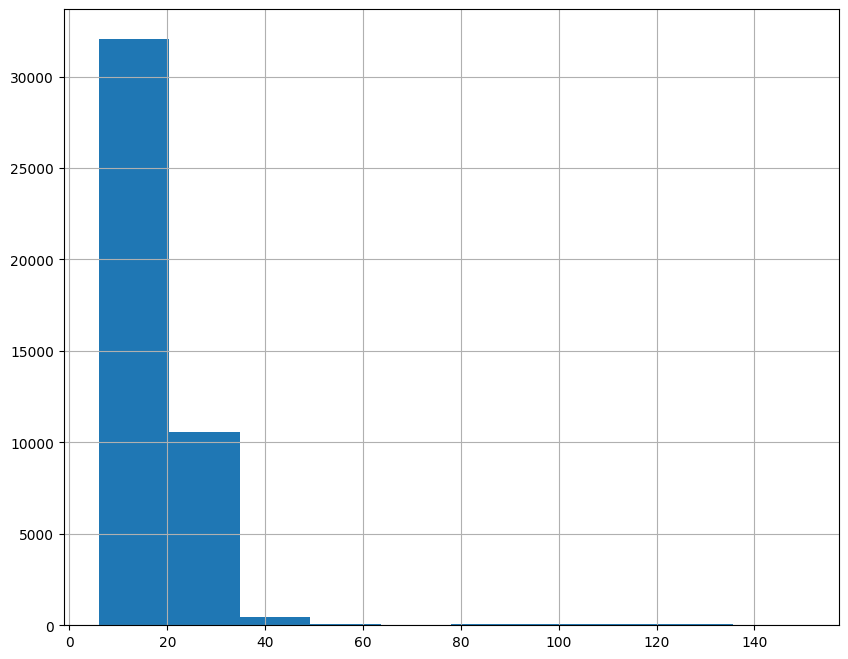

In [68]:
fig, ax = plt.subplots(figsize = (10,8))
fueleco.city08.hist(ax=ax)
#sns.histplot(x= fueleco.city08, data = fueleco,binwidth= 5)

# 다양한 그래프

<Axes: xlabel='city08'>

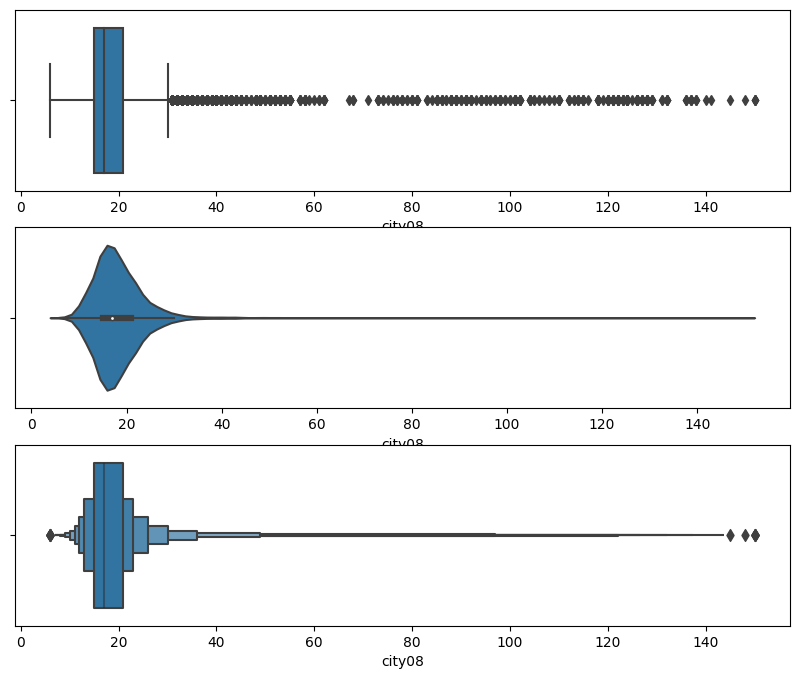

In [69]:
fig,axs = plt.subplots(nrows=3,figsize=(10,8))#nrows : 그래프 행으로 갯수
sns.boxplot(x=fueleco.city08, ax=axs[0])
sns.violinplot(x=fueleco.city08, ax=axs[1])
sns.boxenplot(x=fueleco.city08,ax=axs[2])

In [90]:
#데이터의 정규성 검정 : scipy의 kstest사용
#kstest에서 p-value가 0.05이하면, 비 정규분포
from scipy import stats
stats.kstest(fueleco.city08, cdf='norm')

KstestResult(statistic=0.9999999990134123, pvalue=0.0, statistic_location=6, statistic_sign=-1)

정규분포 성립

((array([-4.15925471, -3.95199683, -3.83894277, ...,  3.83894277,
          3.95199683,  4.15925471]),
  array([  6,   6,   6, ..., 150, 150, 150])),
 (6.229171721346239, 18.65452116633654, 0.7118327651332012))

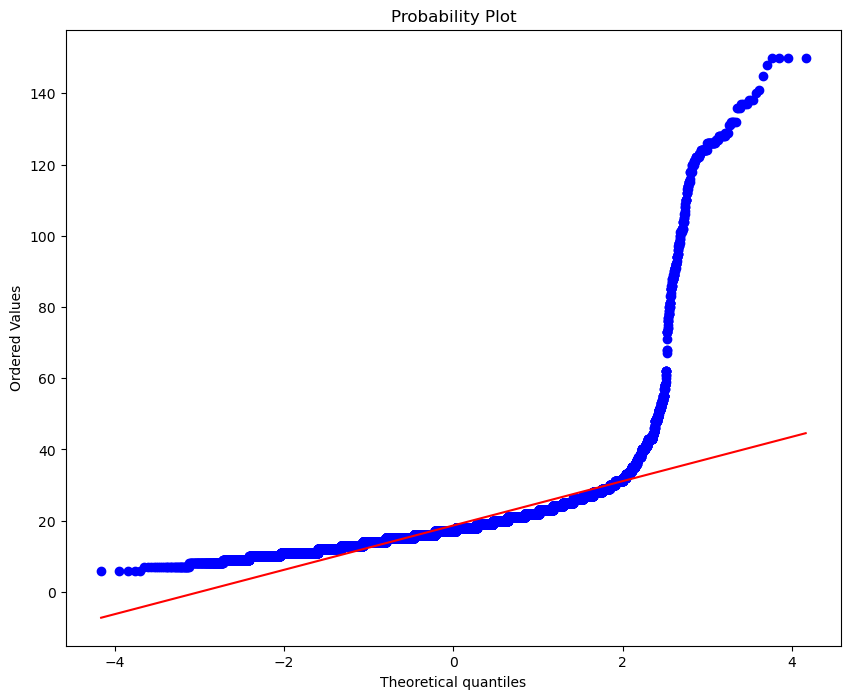

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
stats.probplot(fueleco.city08, plot=ax) #그래프가 직선에 가까울수록 정규분포한다!

In [ ]:
mask = fueleco.make.isin(['Ford','Honda','Tesla','BMW'])

fueleco[mask].groupby('make').city08.agg(['mean','std','min','max','count'])
                                        

,mean,std,min,max,count
make,,,,,
BMW,18.561740,9.562551,9,137,2138
Ford,17.298746,7.646095,9,118,3508
Honda,25.105948,10.113860,14,132,1076
Tesla,103.648148,17.129149,80,150,108


In [91]:
sns.catplot(x='make',y='city08',data = fueleco[mask],kind = 'box')

ValueError: Item wrong length 3 instead of 43418.

In [92]:
g= sns.catplot(x='make',y='city08', data = fueleco[mask], kind='box')
sns.swarmplot(x='make',y='city08', data = fueleco[mask], color = 'k',size=1,ax=g.ax, alpha=.5)

ValueError: Item wrong length 3 instead of 43418.

**swarmplot() : 범주형 값마다 수치형이 어떻게 분포하는지 그려주는 그래프!**

In [73]:
sns.catplot(
    x = 'make',
    y='city08',
    data = fueleco[mask],
    kind ='box',
    col='year', #columns를 뭘로 나눌지
    col_order=[2012,2014,2016,2018], #순서 
    col_wrap=2 #한줄당 몇개 생성할지
)
    

NameError: name 'mask' is not defined

# 두개의 연속 열 비교 - 연속형

In [74]:
fueleco.city08.corr(fueleco.highway08) #강한 선형관계

0.9459442223780542

In [75]:
fueleco[['city08', 'highway08', 'cylinders']].corr()

,city08,highway08,cylinders
city08,1.000000,0.945944,-0.683170
highway08,0.945944,1.000000,-0.647252
cylinders,-0.683170,-0.647252,1.000000


In [76]:
mask =np.zeros_like(fueleco[['city08','highway08','cylinders']].corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True #triu => triangle upper 상삼각행렬 인덱스, True 로 변환
mask

/var/folders/_l/nhxw713s4yx4h9jgpqkyf7qw0000gn/T/ipykernel_1208/4010377622.py:1: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  mask =np.zeros_like(fueleco[['city08','highway08','cylinders']].corr(),dtype=np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<Axes: >

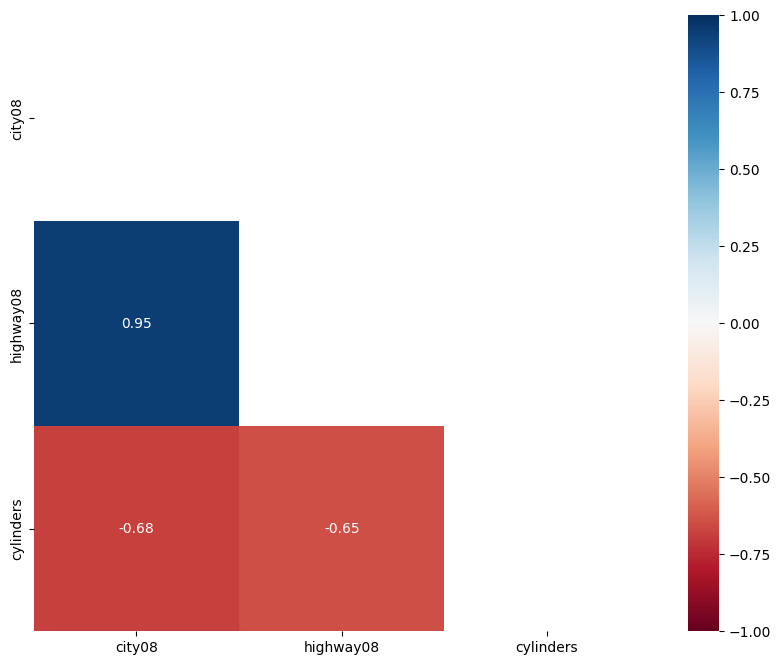

In [77]:
fig,ax = plt.subplots(figsize = (10,8))
corr = fueleco[['city08','highway08','cylinders']].corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap( #heatmap은 상관행렬을 시각화 하는 plot
    corr,
    mask=mask, #상 삼각행렬을 선택함으로써 그래프는 하 삼각행렬만 나옴!
    fmt='.2f', #출력될 숫자 형식
    annot=True, #각 셀에 값을 부여할지 말지
    ax=ax, 
    cmap='RdBu', #색상
    vmin=-1, 
    vmax=1,
    square=True #그래프를 정사각형으로 출력할지 말지
)

**만약 선형관계를 확인할 수 없다면, Spearman Correlation 을 구하는 것이 방법**
> fueleco.city08.corr(fueleco.barrels08, method='spearman')

# 산포도 그래프

<Axes: xlabel='city08', ylabel='highway08'>

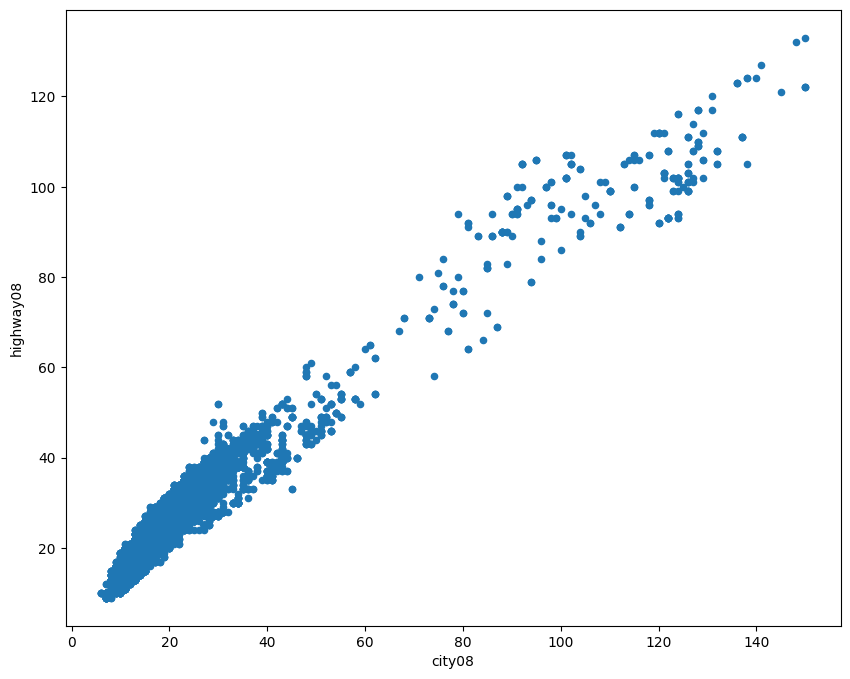

In [78]:
fig, ax = plt.subplots(figsize = (10,8))
fueleco.plot.scatter(
    x='city08',
    y='highway08',
    alpha =1,
    ax=ax
)

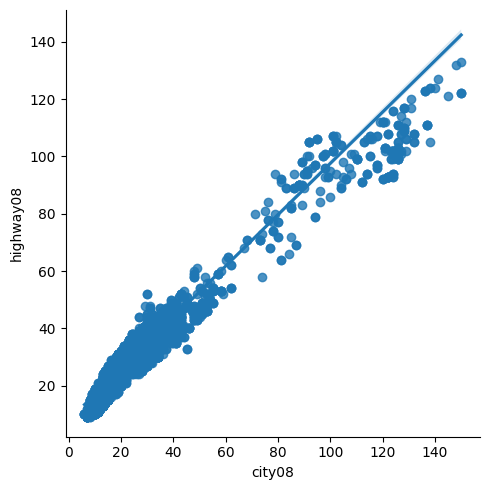

In [79]:
#회귀선 추가 할때!
res = sns.lmplot(
    x='city08', y='highway08', data=fueleco
)

In [80]:
fueleco.VClass.value_counts()

VClass
Compact Cars                          6086
Subcompact Cars                       5381
Midsize Cars                          5184
Large Cars                            2359
Standard Pickup Trucks                2354
Two Seaters                           2215
Sport Utility Vehicle - 4WD           2078
Small Station Wagons                  1662
Sport Utility Vehicle - 2WD           1627
Special Purpose Vehicles              1455
Minicompact Cars                      1452
Standard Pickup Trucks 2WD            1333
Standard Pickup Trucks 4WD            1190
Small Sport Utility Vehicle 4WD       1152
Vans                                  1141
Standard Sport Utility Vehicle 4WD     911
Small Sport Utility Vehicle 2WD        759
Special Purpose Vehicle 2WD            698
Midsize-Large Station Wagons           656
Midsize Station Wagons                 566
Small Pickup Trucks                    538
Small Pickup Trucks 2WD                485
Vans, Cargo Type                       438
Mini

In [81]:
def generalize(ser, match_name, default): #ser은 VClass 칼럼
    seen = None #other 만드는 함수
    for match, name in match_name: #match : 찾을 키워드, name:바꿀 키워드
        mask = ser.str.contains(match) # match : 밑에 있는 리스트! name은 ,변수
        if seen is None:
            seen = mask #처음 mask를 줄 때, mask가 한번씩 쭈욱 들어감.
        else:
            seen = seen | mask
        ser = ser.where(~mask,name) # mask가 있으면! name으로
    ser = ser.where(seen, default) #seen 이 False 이면 default('otehr')로 만들기
    return ser

makes = ['Ford','Tesla','BMW','Toyota']

data = fueleco[fueleco.make.isin(makes)].assign(
    SClass = lambda df_: generalize(df_.VClass,
                                    [('Seaters','Car'),
                                     ('Car','Car'),
                                     ('Utility','SUV'),
                                     ('Truck','Truck'),
                                     ('Van','Van'),
                                     ('van','Van'),
                                     ('Wagon','Wagon'),
                                    ],
                                    'other')
)
                                     

In [82]:
data.groupby(['make','SClass']).size().unstack() #행 인덱스를 열 인덱스로 바꿔 DF로 전환

SClass,Car,SUV,Truck,Van,Wagon,other
make,,,,,,
BMW,1821.0,224.0,NaN,NaN,93.0,NaN
Ford,1171.0,464.0,1116.0,339.0,160.0,258.0
Tesla,76.0,32.0,NaN,NaN,NaN,NaN
Toyota,877.0,442.0,513.0,102.0,132.0,123.0


In [83]:
pd.crosstab(data.make, data.fuelType1) # crosstab : (x, y) 교차 빈도수

fuelType1,Diesel,Electricity,Natural Gas,Premium Gasoline,Regular Gasoline
make,,,,,
BMW,40,14,0,1886,198
Ford,40,20,19,93,3336
Tesla,0,108,0,0,0
Toyota,17,7,3,122,2040
